### Algorithm Evaluation 

#### Find out model that work best for given data 

### Step 1: Read the dataset

In [1]:
import pandas as pd

df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2 : Perform Basic Data Quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Seperate X and Y

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

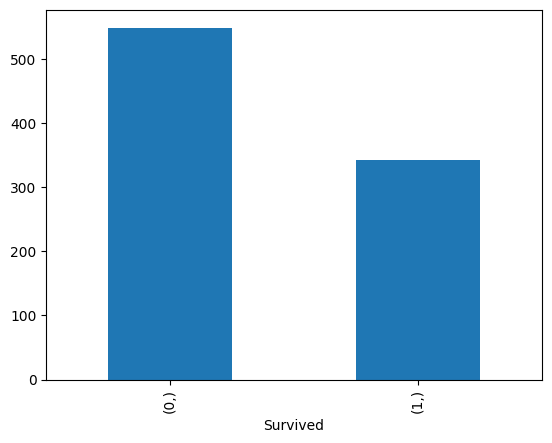

In [9]:
Y.value_counts().plot(kind='bar')

### Step 4 : Perform preprocessing on X

In [14]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [17]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [21]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [22]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [23]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [24]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [25]:
xtrain.shape

(712, 10)

In [26]:
xtest.shape

(179, 10)

### Step 6: Algorithm Evaluation

#### KNN and SVM should be used when data is up to 1000 rows

In [27]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
dct = {
    "Logistic" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGBoost" : xgb.XGBClassifier(),
    "KNN" : KNeighborsClassifier(),
    "SVM" : SVC()
 }

In [30]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('KNN', KNeighborsClassifier()), ('SVM',

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [33]:
# Initialize train, test and cv scores blank list
train = []
test = []
train_cv = []

# Apply for Loop on the models
for name, model in dct.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculate F1 score for train and test
    train_f1 = f1_score(ytrain, ypred_train, average='macro')
    test_f1 = f1_score(ytest, ypred_test, average='macro')

    # Calculate 5 fold cv score for data 
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro') 
    cv = float(scores.mean())

    # Append above values in dictionary
    train.append(train_f1)
    test.append(test_f1)
    train_cv.append(cv)

    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train F1 macro : {train_f1:.4f}')
    print(f'Test F1 macro : {test_f1:.4f}')
    print(f'Train 5 fold CV F1 Macro : {cv:.4f}')
    print('\n===================================================\n')








d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Le

Model Name : Logistic

Train F1 macro : 0.7876
Test F1 macro : 0.7931
Train 5 fold CV F1 Macro : 0.7820


Model Name : Decision Tree

Train F1 macro : 0.9834
Test F1 macro : 0.7694
Train 5 fold CV F1 Macro : 0.7565




d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\DataScience\DataScience\Mach

Model Name : Random Forest

Train F1 macro : 0.9835
Test F1 macro : 0.8049
Train 5 fold CV F1 Macro : 0.7779




d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\M

Model Name : Gradient Boost

Train F1 macro : 0.8943
Test F1 macro : 0.8285
Train 5 fold CV F1 Macro : 0.7913


Model Name : XGBoost

Train F1 macro : 0.9667
Test F1 macro : 0.8420
Train 5 fold CV F1 Macro : 0.7801




d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\DataScience\DataScience\Machine Learn

Model Name : KNN

Train F1 macro : 0.8400
Test F1 macro : 0.8060
Train 5 fold CV F1 Macro : 0.7695


Model Name : SVM

Train F1 macro : 0.8240
Test F1 macro : 0.8265
Train 5 fold CV F1 Macro : 0.8044




d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\DataScience\DataScience\Machine Le

### Create dataframe and show results in tabular format

In [34]:
results = {
    'name' : list(dct.keys()),
    'train_f1' : train,
    'test_f1' : test,
    'train_cv' : train_cv
}

In [35]:
results_df = pd.DataFrame(results)
results_df

,name,train_f1,test_f1,train_cv
0,Logistic,0.787602,0.793077,0.781993
1,Decision Tree,0.983432,0.769429,0.756455
2,Random Forest,0.983458,0.804901,0.777870
3,Gradient Boost,0.894330,0.828550,0.791285
4,XGBoost,0.966678,0.842043,0.780104
5,KNN,0.840032,0.805952,0.769517
6,SVM,0.824030,0.826533,0.804357


In [36]:
results_df.sort_values(by='train_cv', ascending=False)

,name,train_f1,test_f1,train_cv
6,SVM,0.824030,0.826533,0.804357
3,Gradient Boost,0.894330,0.828550,0.791285
0,Logistic,0.787602,0.793077,0.781993
4,XGBoost,0.966678,0.842043,0.780104
2,Random Forest,0.983458,0.804901,0.777870
5,KNN,0.840032,0.805952,0.769517
1,Decision Tree,0.983432,0.769429,0.756455


### From above SVM Model has best f1 macro cross validated score of 0.804357

In [37]:
best_model = SVC()
best_model.fit(xtrain, ytrain)

d:\DataScience\DataScience\Machine Learning\MachineLearningDemo\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [38]:
best_model.score(xtrain, ytrain)

0.8412921348314607

In [39]:
best_model.score(xtest, ytest)

0.8379888268156425